## Implementing a Convolutional Neural Network Using Keras

In [14]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
import tensorflow.keras as keras
import math
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import the Data Set and Create Training and Test Sets



In [15]:
# The mnist data set comes preloaded 
mnist = keras.datasets.mnist

# Create training and test sets
(X_train, y_train),(X_test, y_test) = mnist.load_data()


### Inspect the Data

<b>Task</b>: In the code cell below, inspect the datatype and dimensions (shape) of the training and test data (`X_train`, `y_train`, `X_test`, `y_test`). 

In [16]:
#   
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(10000,)

Notice that the training and test data sets are NumPy arrays. 

* <b>Training data:</b><br>
    `X_train` is a three-dimensional array of shape `(60000, 28, 28)`. It contains grayscale image data. Pixel values range from 0 to 255.<br>
    `y_train` is a one-dimensional array with shape `(6000,)`. It contains digit labels (integers in range 0-9).


* <b>Test data:</b><br>
    `X_test` is a three-dimensional array of shape `(10000, 28, 28)`. It contains grayscale image data. Pixel values range from 0 to 255.<br>`y_test` is a one-dimensional array with shape `(1000,)`. It contains digit labels (integers in range 0-9).

Let's take a look at the data in more detail. Let's inspect the first example (which contains an image) in `X_train`:


In [17]:
X_train[0].shape

(28, 28)

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

As expected, the first example in the training data is a 28 x 28 array.  This array encodes the grayscale value of the  hand-written image, i.e., each entry in the 28 x 28 array encodes the intensity (darkness) of the corresponding pixel. 

### Visualize the Data

Let's visualize an image below.

<b>Task</b>: In the code cell below, use the Seaborn`heatmap()` function to display any image contained in `X_train`.

<AxesSubplot: >

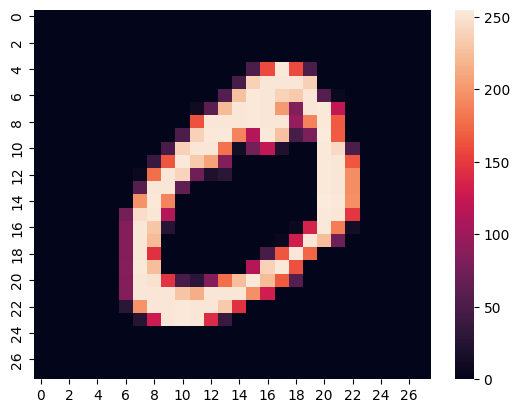

In [19]:
#  
sns.heatmap(X_train[1])

<b>Task</b>: Inspect the corresponding label in `y_train` to confirm that the label matches the image you see in the heatmap above.

In [20]:
#  
y_train[1]

0

<b>Task</b>: Which digit appeared in your heatmap? Did it match its label? Record your findings in the cell below.

The digit that appeared in my heatmap was a 0. It matched its label.

We've created a function `plot_imgs()` to help us visualize the image data. Let's use this function to inspect a few more examples in the training data. Execute the two code cells below.

In [21]:
# Function to visualize the data
def plot_imgs(images, labels=None):
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel(labels[i])
    plt.show()
    

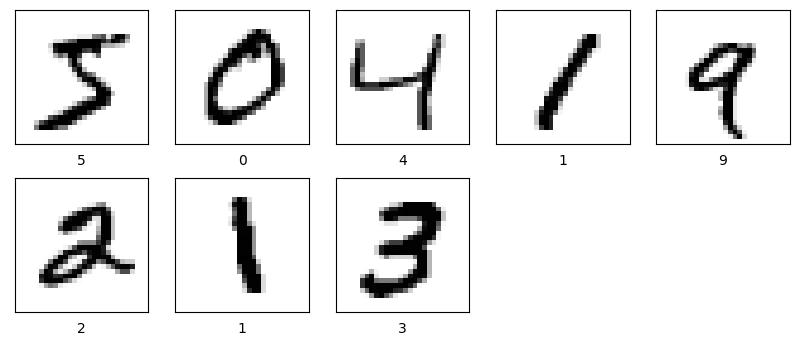

In [9]:
# Visualize some training examples
plot_imgs(X_train[:8], y_train[:8])

## Part 3. Prepare the Data

Let's now prepare our data to be suitable for a CNN.

#### Scale the Data

Our MNIST data is raw data containing pixel values between 0 and 255. Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the training process. Therefore, it is a good practice to normalize the pixel values so that each pixel has a value between 0 and 1. This can be done by dividing all pixels values by the largest pixel value; that is 255. 

<b>Task:</b> In the code cell below, normalize the pixel values in `X_train` and `X_test` to be between 0 and 1 by dividing all feature values by 255.0.

In [22]:
#  
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Reshape the Data
A CNN in Keras requires a 4-dimensional array as input in the form: `(num_examples, image_dimension_X, image_dimension_Y, num_channels)`.

Since grayscale has only one color channel, every example in `X_train` would have the shape `(28, 28, 1)`. `X_test` should have the same dimensions.

<b>Task:</b> In the code cell below: 
1. reshape every example in `X_train` to have the shape `(num_examples_X_train, 28, 28, 1)`.
1. reshape every example in `X_test` to have the shape `(num_examples_X_test, 28, 28, 1)`.

<i>Hint:</i> use the NumPy `reshape()` function. Consult the online [documentation](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) for more information.

In [23]:
#  
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

## Part 4. Construct the Convolutional Neural Network

In [25]:
# 1. Create CNN model object

#  
cnn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
#  
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1:]))
cnn_model.add(input_layer)

# 3. Create the first convolutional layer and add it to the model object:
#  
conv1 = keras.layers.Conv2D(16, 3)
batchNorm_1 = keras.layers.BatchNormalization()
ReLU_1 = keras.layers.ReLU()
cnn_model.add(conv1)
cnn_model.add(batchNorm_1)
cnn_model.add(ReLU_1)

# 4. Create the second convolutional layer and add it to the model object:
#  
conv2 = keras.layers.Conv2D(32, 3)
batchNorm_2 = keras.layers.BatchNormalization()
ReLU_2 = keras.layers.ReLU()
cnn_model.add(conv2)
cnn_model.add(batchNorm_2)
cnn_model.add(ReLU_2)

# 5. Create the third convolutional layer and add it to the model object:
#  
conv3 = keras.layers.Conv2D(64, 3)
batchNorm_3 = keras.layers.BatchNormalization()
ReLU_3 = keras.layers.ReLU()
cnn_model.add(conv3)
cnn_model.add(batchNorm_3)
cnn_model.add(ReLU_3)

# 6. Create the fourth convolutional layer and add it to the model object:
conv4 = keras.layers.Conv2D(128, 3)
batchNorm_4 = keras.layers.BatchNormalization()
ReLU_4 = keras.layers.ReLU()
cnn_model.add(conv4)
cnn_model.add(batchNorm_4)
cnn_model.add(ReLU_4)


# 7. Create the pooling layer and add it to the model object:
#  
pooling_layer = keras.layers.GlobalAveragePooling2D()
cnn_model.add(pooling_layer)

# 8. Create the output layer and add it to the model object:
#  
output_layer = keras.layers.Dense(units=10)
cnn_model.add(output_layer)

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
re_lu_12 (ReLU)              (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
re_lu_13 (ReLU)              (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 64)       

### Step 2. Define the Optimization Function

<b>Task:</b> In the code cell below, create a stochastic gradient descent optimizer using  `keras.optimizers.SGD()`. Specify a learning rate of 0.1 using the `learning_rate` parameter. Assign the result to the variable`sgd_optimizer`.

In [26]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)

### Step 3. Define the loss function

<b>Task:</b> In the code cell below, create a sparse categorical cross entropy loss function using `keras.losses.SparseCategoricalCrossentropy()`. This is an extension of the categorical cross entropy loss function. It is used when there are two or more label classes and the labels are integers. For more information, consult the online [SparseCategoricalCrossentropy documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy). Use the parameter `from_logits=True`. Assign the result to the variable  `loss_fn`.

In [27]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

### Step 4. Compile the model

<b>Task:</b> In the code cell below, package the network architecture with the optimizer and the loss function using the `cnn_model.compile()` method. Specify the optimizer, loss function and the accuracy evaluation metric as arguments.

In [28]:
#  
cnn_model.compile(sgd_optimizer, loss_fn, metrics=['accuracy'])

## Part 5. Fit the Model to the Training Data

We can now fit the CNN model to the training data. Since there are 60,000 training examples and nearly 100,000 parameters to fit, this may take a while to run. Therefore, we will only choose one epoch in this assignment.

<b>Task:</b> In the code cell below, fit the CNN model to the training data using the `fit()` method. Call `cnn_model.fit()` with the following arguments:
1. The training data sets.
2. The number of epochs.

Save the results to the variable `history`. 

<b>Note</b>: This may take a while to run.

In [31]:
num_epochs = 1 # Number of epochs

t0 = time.time() # start time

history = cnn_model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
)

t1 = time.time() # stop time

print('Elapsed time: %.2fs' % (t1-t0))

1875/1875 [==============================] - 67s 36ms/step - loss: 0.3577 - accuracy: 0.9120
Elapsed time: 67.76s


## Part 6. Evaluate the Model's Performance

Let's now evaluate our CNN model's performance on our test data and see how it did.


<b>Task:</b> In the code cell below, call the `cnn_model.evaluate()` method with the test data sets as arguments. The `evaluate()` method returns a list containing two values. The first value is the loss and the second value is the accuracy score. 


In [32]:
loss, accuracy = cnn_model.evaluate(X_test, y_test)

print('Loss: ', str(loss) , 'Accuracy: ', str(accuracy))

313/313 [==============================] - 3s 10ms/step - loss: 0.1355 - accuracy: 0.9622
Loss:  0.1355074793100357 Accuracy:  0.9621999859809875


Next we'll make some predictions on the test set and see for ourselves how accurate these predictions are.

<b>Task:</b> In the code cell below, call the `plot_imgs()` functions with the first 25 images in `X_test` as the first argument, and the first 25 labels in `predictions` as the second argument. 

The result should be a display of the first 25 images in the test set `X_test`, and below each image, a display of the predicted digit. How well did we do?

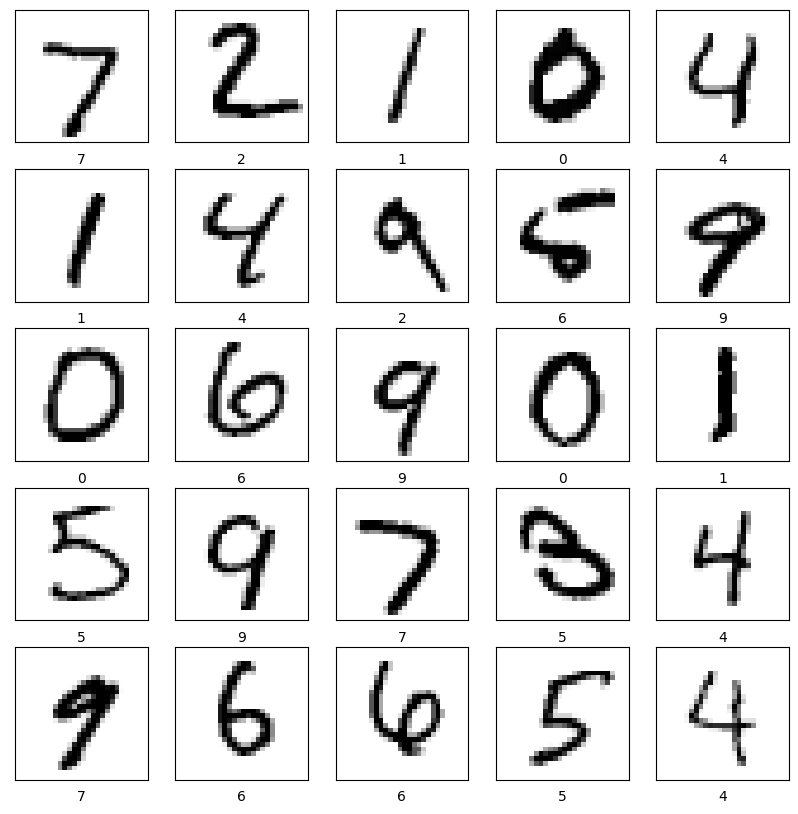

In [33]:
# Make predictions on the test set
logits = cnn_model.predict(X_test)
predictions = logits.argmax(axis = 1)


## Plot individual predictions
plot_imgs(X_test[:25], predictions[:25])